In [228]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima


In [229]:
data = pd.read_csv('report.csv')

In [230]:
data.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10


In [231]:
data.shape

(2829, 15)

In [232]:
len(data['report_year'].unique())

41

In [233]:
data.reset_index(drop=True)

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,2015,OK07205,"Tulsa, OK",401520.0,3628.0,55.0,365.0,2354.0,854.0,NaN,903.57,13.70,90.90,586.27,212.69
2825,2015,VA12800,"Virginia Beach, VA",452797.0,626.0,19.0,103.0,234.0,270.0,NaN,138.25,4.20,22.75,51.68,59.63
2826,2015,DCMPD00,"Washington, DC",672228.0,8084.0,162.0,494.0,4024.0,3404.0,NaN,1202.57,24.10,73.49,598.61,506.38
2827,2015,KS08703,"Wichita, KS",389824.0,3839.0,27.0,349.0,2730.0,733.0,NaN,984.80,6.93,89.53,700.32,188.03


In [234]:
data.isnull().sum()

report_year              0
agency_code             41
agency_jurisdiction      0
population              69
violent_crimes          35
homicides               34
rapes                   75
assaults                76
robberies               75
months_reported        137
crimes_percapita        35
homicides_percapita     34
rapes_percapita         75
assaults_percapita      76
robberies_percapita     75
dtype: int64

In [235]:
data.isnull().sum()

report_year              0
agency_code             41
agency_jurisdiction      0
population              69
violent_crimes          35
homicides               34
rapes                   75
assaults                76
robberies               75
months_reported        137
crimes_percapita        35
homicides_percapita     34
rapes_percapita         75
assaults_percapita      76
robberies_percapita     75
dtype: int64

In [236]:
data=data[['report_year','agency_jurisdiction','homicides']]

In [237]:
data.head()

,report_year,agency_jurisdiction,homicides
0,1975,"Albuquerque, NM",30.0
1,1975,"Arlington, TX",5.0
2,1975,"Atlanta, GA",185.0
3,1975,"Aurora, CO",7.0
4,1975,"Austin, TX",33.0


In [238]:
df=data.loc[data['agency_jurisdiction'] == 'United States']

In [239]:
df.head()

,report_year,agency_jurisdiction,homicides
68,1975,United States,20510.0
137,1976,United States,18780.0
206,1977,United States,19120.0
275,1978,United States,19560.0
344,1979,United States,21460.0


In [240]:
df.isnull().sum()

report_year            0
agency_jurisdiction    0
homicides              0
dtype: int64

In [241]:
df.reset_index(drop=True)

,report_year,agency_jurisdiction,homicides
0,1975,United States,20510.0
1,1976,United States,18780.0
2,1977,United States,19120.0
3,1978,United States,19560.0
4,1979,United States,21460.0
5,1980,United States,23040.0
6,1981,United States,22520.0
7,1982,United States,21010.0
8,1983,United States,19308.0
9,1984,United States,18692.0


In [242]:
hc=df[['report_year','homicides']]
hc.set_index('report_year',inplace=True)
hc.shape

(41, 1)

In [243]:
hc.head()

,homicides
report_year,
1975,20510.0
1976,18780.0
1977,19120.0
1978,19560.0
1979,21460.0


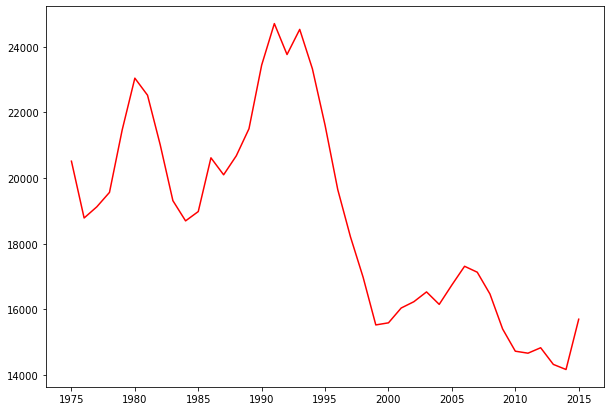

In [244]:
plt.figure(figsize=(10,7))
plt.plot(df['report_year'],df['homicides'],'r-')

In [245]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(hc)


(0.3700107316044693, True)

In [246]:
from statsmodels.tsa.stattools import adfuller

In [247]:
result = adfuller(hc, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -1.851267369819736
n_lags: 0.35532198132329673
p-value: 0.35532198132329673
Critial Values:
   1%, -3.610399601308181
Critial Values:
   5%, -2.939108945868946
Critial Values:
   10%, -2.6080629651545038


In [260]:
train=hc[:35]
test=hc[34:]

In [261]:
train.tail()

,homicides
report_year,
2005,16740.0
2006,17309.0
2007,17128.0
2008,16465.0
2009,15399.0


In [262]:
test.head()

,homicides
report_year,
2009,15399.0
2010,14722.0
2011,14661.0
2012,14827.0
2013,14319.0


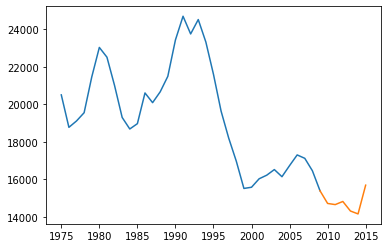

In [263]:
plt.plot(train)
plt.plot(test)

C:\Users\manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\manish\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


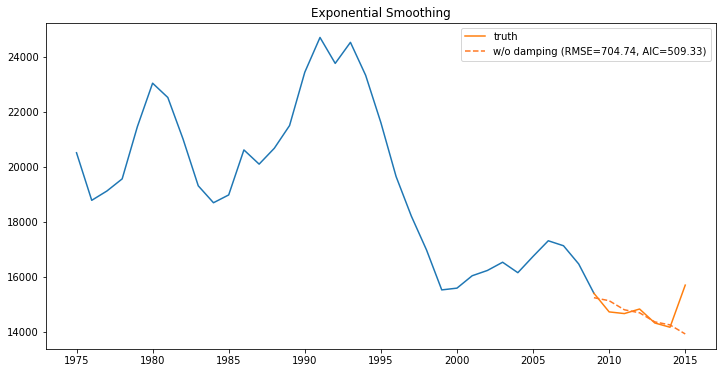

In [303]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=2)
#model2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12, damped=True)
fit = model.fit()
pred = fit.forecast(7)
#fit2 = model2.fit()
#pred2 = fit2.forecast(7)

sse1 = np.sqrt(np.mean(np.square(test.values - pred.values)))
#sse2 = np.sqrt(np.mean(np.square(test.values - pred2.values)))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[:35], train.values[:35]);
ax.plot(test.index, test.values, label='truth');
ax.plot(test.index, pred, linestyle='--', color='#ff7823',label="w/o damping (RMSE={:0.2f}, AIC={:0.2f})".format(sse1, fit.aic));
#ax.plot(test.index, pred2, linestyle='--', color='#3c763d',label="damped (RMSE={:0.2f}, AIC={:0.2f})".format(sse2, fit2.aic)); 
ax.legend();
ax.set_title("Exponential Smoothing");

In [304]:
from sklearn.metrics import r2_score
r2_score(test, pred)

-0.8669775219025253

In [283]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=7, max_d=2, max_q=7, start_P=1, 
                          D=0, start_Q=0, max_P=5, max_D=5,
                          max_Q=0, m=10, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,random_state=None,n_fits = 20 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,0)[10] intercept   : AIC=579.387, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[10] intercept   : AIC=577.435, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[10] intercept   : AIC=581.462, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[10] intercept   : AIC=579.439, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[10]             : AIC=576.051, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[10] intercept   : AIC=579.499, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[10] intercept   : AIC=581.045, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[10]          
Total fit time: 0.492 seconds


In [285]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   35
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -287.025
Date:                Fri, 08 Jan 2021   AIC                            576.051
Time:                        22:35:36   BIC                            577.577
Sample:                             0   HQIC                           576.571
                                 - 35                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.258e+06   4.38e+05      2.872      0.004       4e+05    2.12e+06
===================================================================================
Ljung-Box (L1) (Q):                   8.45   Jarque-Bera (JB):                 1.51
Prob(Q):                              0.00   Prob(JB):                         0.47
Heteroskedasticity (H):               0.27   Skew:                             0.14
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [286]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 7),index=test.index)
prediction.columns = ['predicted_homicide_crimes']
prediction

,predicted_homicide_crimes
report_year,
2009,15399.0
2010,15399.0
2011,15399.0
2012,15399.0
2013,15399.0
2014,15399.0
2015,15399.0


Predicted Homicide Crime Rates of USA 


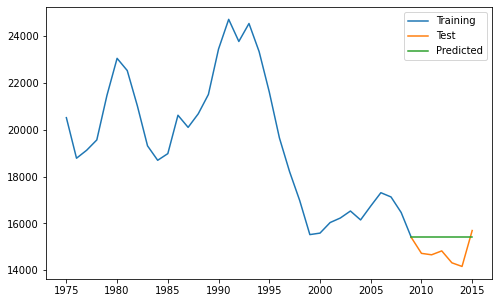

In [287]:
print("Predicted Homicide Crime Rates of USA ")
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend()
plt.show()

In [288]:
from sklearn.metrics import r2_score
r2_score(test['homicides'], prediction['predicted_homicide_crimes'])


-1.2600263850999127